# Week 2 Exploratory Data Analysis (EDA)

- Data Transformations
- Merging
- Grouping
- Exploratory Data Analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Data Tranformations

**Transform Data Using a Function or Mapping**

In [ ]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon',
                              'Pastrami', 'corned beef', 'Bacon',
                              'pastrami', 'honey ham', 'nova lox'],
                     'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [ ]:
# Suppose that we want to map the meat type to the kind of animal:
meat_to_animal = {
  'bacon': 'pig',
  'pulled pork': 'pig',
  'pastrami': 'cow',
  'corned beef': 'cow',
  'honey ham': 'pig',
  'nova lox': 'salmon'
}

data['animal'] = data['food'].map(meat_to_animal)
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,NaN
4,corned beef,7.5,cow
5,Bacon,8.0,NaN
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [ ]:
# We can also apply a function to the data frame.
data['animal'] = data['food'].apply(lambda x: meat_to_animal[x.lower()])

data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


## Merging Datasets

In many applications, data may be spread across a number of files or be arranged in a form that is not easy to analyze. This section focuses on tools to help combine, join, and rearrange data.

### 1. Default merge operation for data frames

In [ ]:
# Generate two data frames
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [ ]:
df2 = pd.DataFrame({'key': ['a', 'b', 'd'],
                    'data2': range(3)})
df2

,key,data2
0,a,0
1,b,1
2,d,2


In [ ]:
# merge df1 with df2
df1.merge(df2)

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [ ]:
df1.loc[0,'key'] = df1.loc[0,'key']+"a"
df1

,key,data1
0,ba,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [ ]:
pd.merge(df1,df2, indicator=True)

,key,data1,data2,_merge
0,b,1,1,both
1,b,6,1,both
2,a,2,0,both
3,a,4,0,both
4,a,5,0,both


In [ ]:
# It is the same as df2.merge(df1)
df2.merge(df1)

,key,data2,data1
0,a,0,2
1,a,0,4
2,a,0,5
3,b,1,0
4,b,1,1
5,b,1,6


In [ ]:
pd.merge(df2, df1)

,key,data2,data1
0,a,0,2
1,a,0,4
2,a,0,5
3,b,1,1
4,b,1,6


It is a good practice to specify explicitly which column(s) to join on.

In [ ]:
pd.merge(df1, df2, on='key')

,key,data1,data2
0,b,1,1
1,b,6,1
2,a,2,0
3,a,4,0
4,a,5,0


### 2. What if the column to join has different names in the two data frames?

In [ ]:
homework = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Clare'],
    'Hw1': [100, 90, 80],
    'Hw2': [60, 70, 80]
})
homework

,Name,Hw1,Hw2
0,Alice,100,60
1,Bob,90,70
2,Clare,80,80


In [ ]:
exam = pd.DataFrame({
    "Full Name": ['Alice', 'Bob', 'Clare'],
    "Midterm": [70, 80, 90],
    "Final": [85, 65, 75]
})
exam

,Full Name,Midterm,Final
0,Alice,70,85
1,Bob,80,65
2,Clare,90,75


In [ ]:
# Use left_on and right_on to match the columns
pd.merge(homework, exam, left_on='Name', right_on="Full Name")

,Name,Hw1,Hw2,Full Name,Midterm,Final
0,Alice,100,60,Alice,70,85
1,Bob,90,70,Bob,80,65
2,Clare,80,80,Clare,90,75


### 3. What if the column to join has different values?

In [ ]:
homework = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Clare', 'David'],
    'Hw1': [100, 90, 80, 70],
    'Hw2': [60, 70, 80, 90]
})
homework

,Name,Hw1,Hw2
0,Alice,100,60
1,Bob,90,70
2,Clare,80,80
3,David,70,90


In [ ]:
exam = pd.DataFrame({
    "Full Name": ['Alice', 'Bob', 'Clare', 'Eli'],
    "Midterm": [70, 80, 90, 100],
    "Final": [85, 65, 75, 55]
})
exam

,Full Name,Midterm,Final
0,Alice,70,85
1,Bob,80,65
2,Clare,90,75
3,Eli,100,55


In [ ]:
# Default merge will drop values that cannot find a match
pd.merge(homework, exam,
         left_on="Name",
         right_on="Full Name")

,Name,Hw1,Hw2,Full Name,Midterm,Final
0,Alice,100,60,Alice,70,85
1,Bob,90,70,Bob,80,65
2,Clare,80,80,Clare,90,75


Different join types with `how` argument
- inner: Use only the keys combinations observed in both tables
- outer: Use all possible keys combinations
- left: Use all keys found in the first data frame
- right: Use all keys found in the second data frame

In [ ]:
# Merge the datasets so that every student has a record.

pd.merge(homework, exam,
         left_on="Name",
         right_on="Full Name",
         how="outer")

,Name,Hw1,Hw2,Full Name,Midterm,Final
0,Alice,100.0,60.0,Alice,70.0,85.0
1,Bob,90.0,70.0,Bob,80.0,65.0
2,Clare,80.0,80.0,Clare,90.0,75.0
3,David,70.0,90.0,NaN,NaN,NaN
4,NaN,NaN,NaN,Eli,100.0,55.0


### 4. What if we want to join on multiple columns?

In [ ]:
homework = pd.DataFrame({
    'Semester': ['Fall 2018', 'Fall 2018', 'Fall 2019', 'Fall 2019'],
    'Name': ['Alice', 'Bob', 'Clare', 'Alice'],
    'Hw1': [50, 90, 80, 70],
    'Hw2': [60, 70, 80, 90]
})
homework

,Semester,Name,Hw1,Hw2
0,Fall 2018,Alice,50,60
1,Fall 2018,Bob,90,70
2,Fall 2019,Clare,80,80
3,Fall 2019,Alice,70,90


In [ ]:
exam = pd.DataFrame({
    'When': ['Fall 2018', 'Fall 2018', 'Fall 2019', 'Fall 2019'],
    "Name": ['Alice', 'Bob', 'Clare', 'Alice'],
    "Midterm": [60, 80, 90, 100],
    "Final": [45, 65, 75, 55]
})
exam

,When,Name,Midterm,Final
0,Fall 2018,Alice,60,45
1,Fall 2018,Bob,80,65
2,Fall 2019,Clare,90,75
3,Fall 2019,Alice,100,55


In [ ]:
# Merge with multiple columns
pd.merge(homework, exam, left_on=["Semester", "Name"], right_on=["When", "Name"])

,Semester,Name,Hw1,Hw2,When,Midterm,Final
0,Fall 2018,Alice,50,60,Fall 2018,60,45
1,Fall 2018,Bob,90,70,Fall 2018,80,65
2,Fall 2019,Clare,80,80,Fall 2019,90,75
3,Fall 2019,Alice,70,90,Fall 2019,100,55


### 5. What if there are overlapping columns?

In [ ]:
homework = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Clare', 'David'],
    'Hw1': [100, 90, 80, 70],
    'Hw2': [60, 70, 80, 90],
    'Average': [80, 80, 80, 80]
})
homework

,Name,Hw1,Hw2,Average
0,Alice,100,60,80
1,Bob,90,70,80
2,Clare,80,80,80
3,David,70,90,80


In [ ]:
exam = pd.DataFrame({
    "Name": ['Alice', 'Bob', 'Clare', 'Eva'],
    "Midterm": [60, 80, 90, 100],
    "Final": [45, 65, 75, 55],
    "Average": [52.5, 72.5, 82.5, 77.5]
})
exam

,Name,Midterm,Final,Average
0,Alice,60,45,52.5
1,Bob,80,65,72.5
2,Clare,90,75,82.5
3,Eva,100,55,77.5


In [ ]:
# Merge the datasets
pd.merge(homework, exam, on="Name",suffixes=("_hw1", "hw2"))

,Name,Hw1,Hw2,Average_hw1,Midterm,Final,Averagehw2
0,Alice,100,60,80,60,45,52.5
1,Bob,90,70,80,80,65,72.5
2,Clare,80,80,80,90,75,82.5


## Data Grouping

Many data processing follows a **split-apply-combine** process. For example, you may want to do the following operations to analyze a dataset about sales:
1. What is the total revenue of each day?
2. What is the total sales of each product?
3. How much has each client perchased in total?

These operations all requires that you split the data into groups, and then apply certain calculations to each of the groups, and finally combine all results into a new table. In Pandas this is mostly done with `groupby()` function.

In [ ]:
# An example:
df = pd.DataFrame({'Name' : ['Alice', 'Bob', 'Charlie', 'Alice', 'Bob', 'Charlie'],
                   'Course' : ['Programming', 'Programming', 'Programming','Data Structure', 'Data Structure','Data Structure',],
                   'Semester': ['Spring 2019', 'Fall 2019', 'Fall 2019', 'Spring 2019', 'Fall 2019', 'Spring 2019'],
                   'Homework' : np.random.randint(60, 100, size=6),
                   'Exam' : np.random.randint(60, 100, size=6)})
df

,Name,Course,Semester,Homework,Exam
0,Alice,Programming,Spring 2019,76,66
1,Bob,Programming,Fall 2019,82,70
2,Charlie,Programming,Fall 2019,64,63
3,Alice,Data Structure,Spring 2019,79,80
4,Bob,Data Structure,Fall 2019,85,68
5,Charlie,Data Structure,Spring 2019,76,82


In [ ]:
pd.merge(df,df['Exam'].groupby(df['Name']).mean().reset_index().rename(columns={'Exam':"Exam_Average"}),on='Name')

,Name,Course,Semester,Homework,Exam,Exam_Average
0,Alice,Programming,Spring 2019,98,87,86.5
1,Alice,Data Structure,Spring 2019,84,86,86.5
2,Bob,Programming,Fall 2019,62,73,82.5
3,Bob,Data Structure,Fall 2019,82,92,82.5
4,Charlie,Programming,Fall 2019,99,65,72.0
5,Charlie,Data Structure,Spring 2019,90,79,72.0


In [ ]:
# Split exam scores according to name
groups = df['Exam'].groupby(df['Name'])

groups

**Iterating Over Groups**

The GroupBy object support iteration, providing a sequence of 2-tuples containing the group name along with the data.

In [ ]:
# Show the content of each group.
for name, group in groups:
    print("Name:", name)
    print(group)

Name: Alice
0    87
3    86
Name: Exam, dtype: int64
Name: Bob
1    73
4    92
Name: Exam, dtype: int64
Name: Charlie
2    65
5    79
Name: Exam, dtype: int64


In [ ]:
# Apply mean() function to find the average value for each group
means = groups.mean()

means

,Exam
Name,
Alice,86.5
Bob,82.5
Charlie,72.0


In [ ]:
# A common practice is to convert the results to a data frame
df_means = means.to_frame(name='Average Exam Score')

df_means

,Average Exam Score
Name,
Alice,86.5
Bob,82.5
Charlie,72.0


**Syntactic sugar**: It is simpler to use the following statement for selecting columns for groupby()

In [ ]:
df_grouped = df.groupby('Name')['Exam'].mean()
print(type(df_grouped))
df_grouped

<class 'pandas.core.series.Series'>


,Exam
Name,
Alice,86.5
Bob,82.5
Charlie,72.0


In [ ]:
df_grouped.reset_index()[['Name','Exam']]

,Name,Exam
0,Alice,86.5
1,Bob,82.5
2,Charlie,72.0


### Split Data with Multiple Columns

We can use more than one column as keys to split data into groups.

In [ ]:
# Split the exam score according to both course name and semester and
# calculate the average score.

avg = df.groupby(['Name', 'Semester'])['Exam'].mean()
print(type(avg))
avg

<class 'pandas.core.series.Series'>


Name     Semester   
Alice    Spring 2019    86.5
Bob      Fall 2019      82.5
Charlie  Fall 2019      65.0
         Spring 2019    79.0
Name: Exam, dtype: float64

The result is a data series with **hierarchical indexing**. It can be converted to a data frame using `unstack()`.

In [ ]:
# Convert the result to a data frame so that it can be displayed as a table.
print(type(avg.unstack(level=0)))
print(avg.unstack(level=0)['Alice'])
avg.unstack(level=0)

<class 'pandas.core.frame.DataFrame'>
Semester
Fall 2019       NaN
Spring 2019    86.5
Name: Alice, dtype: float64


Name,Alice,Bob,Charlie
Semester,,,
Fall 2019,NaN,82.5,65.0
Spring 2019,86.5,NaN,79.0


### Grouping with functions

Any function passed as a group key will be called once per index value, with the returned values being used as the group names.

In [ ]:
def get_initial(name):
    return name

In [ ]:
df

,Name,Course,Semester,Homework,Exam
0,Alice,Programming,Spring 2019,76,66
1,Bob,Programming,Fall 2019,82,70
2,Charlie,Programming,Fall 2019,64,63
3,Alice,Data Structure,Spring 2019,79,80
4,Bob,Data Structure,Fall 2019,85,68
5,Charlie,Data Structure,Spring 2019,76,82


In [ ]:
df = df.set_index("Name")
df

,Course,Semester,Homework,Exam
Name,,,,
Alice,Programming,Spring 2019,76,66
Bob,Programming,Fall 2019,82,70
Charlie,Programming,Fall 2019,64,63
Alice,Data Structure,Spring 2019,79,80
Bob,Data Structure,Fall 2019,85,68
Charlie,Data Structure,Spring 2019,76,82


In [ ]:
df[['Exam','Homework']].groupby(get_initial).mean()

,Exam,Homework
Name,,
Alice,73.0,77.5
Bob,69.0,83.5
Charlie,72.5,70.0


In [ ]:
# The function can be defined via lambda expression
df['Exam'].groupby(lambda x: x[0]).mean()

,Exam
Name,
A,73.0
B,69.0
C,72.5


## Exploratory Data Analysis

It is usually very challenging to make sense of large datasets. Exploratory data analysis is an important step to analyze the data.
- Summarize main characteristics
- Visualize data distribution
- Handle missing values and outliers
- Form hypotheses

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

In [ ]:
#if you need to upload a kaggle api auth .json

# from google.colab import files
# files.upload()

{}

In [ ]:
# ! mkdir ~/.kaggle
# ! cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json
# ! kaggle datasets list

You will need to agree to the kaggle competition terms before you are authorized to download (https://www.kaggle.com/competitions/nyc-taxi-trip-duration/data)

In [ ]:
! kaggle competitions download -c nyc-taxi-trip-duration

nyc-taxi-trip-duration.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip nyc-taxi-trip-duration.zip

Archive:  nyc-taxi-trip-duration.zip
replace sample_submission.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sample_submission.zip   
replace test.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y A
  inflating: test.zip                
replace train.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: train.zip               


In [ ]:
!unzip train.zip

Archive:  train.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: train.csv               


In [ ]:
# Load the data set
raw_data = pd.read_csv("train.csv", sep=',')
raw_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


### 1. Summarize Main Characteristics

In [ ]:
# Display the size of the dataset
print(raw_data.shape)

(1458644, 11)


In [ ]:
# Display column names
print(raw_data.columns)

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')


In [ ]:
# Display data types
print(raw_data.dtypes)

# Anything needs adjustment?

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object


In [ ]:
# Change the data type of the datetime columns
raw_data['pickup_datetime'] = raw_data['pickup_datetime'].astype(np.datetime64)
raw_data['dropoff_datetime'] = raw_data['dropoff_datetime'].astype(np.datetime64)

print(raw_data.dtypes)

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object


In [ ]:
# Check for missing values
raw_data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [ ]:
# Unique values
raw_data.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

In [ ]:
# Descriptive statistics
raw_data.describe()

# Notice anything worth mentioning?


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


### 2. Univariate Analysis

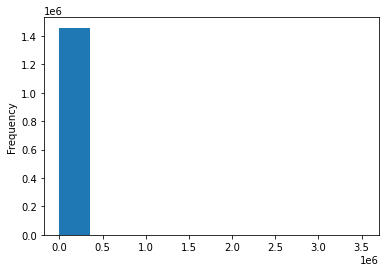

In [ ]:
# Display the distribution of trip durations
raw_data['trip_duration'].plot.hist()

# Notice anything?

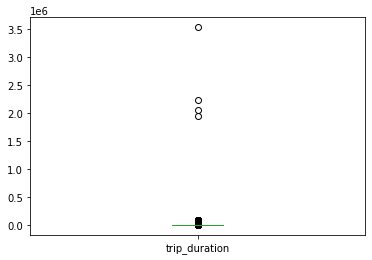

In [ ]:
# Show a boxplot of trip durations

raw_data['trip_duration'].plot.box()

In [ ]:
# There are several outliers.
# Remove the outliers

# Find out the 1% percentile and the 99% percentile of trip durations
lower_limit = raw_data['trip_duration'].quantile(0.05)
upper_limit = raw_data['trip_duration'].quantile(0.99)

filter = (raw_data['trip_duration'] > lower_limit) & (raw_data['trip_duration'] < upper_limit)
data = raw_data[filter]

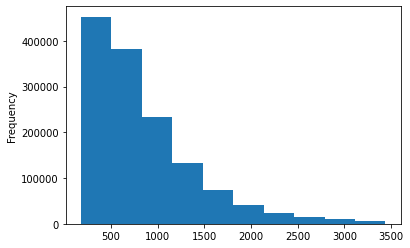

In [ ]:
data['trip_duration'].plot.hist()

In [ ]:
# Vendor ID: what difference does it make?

# Does different vendor give different avereage trip duration?
data.groupby('vendor_id')['trip_duration'].mean()


vendor_id
1    840.536478
2    846.793364
Name: trip_duration, dtype: float64

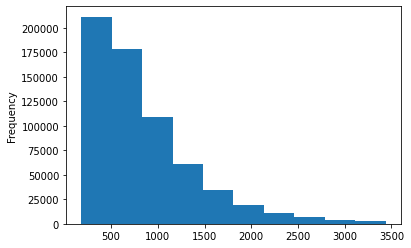

In [ ]:
# visualize the trip duration from different vendors
data[data['vendor_id'] == 1]['trip_duration'].plot.hist()

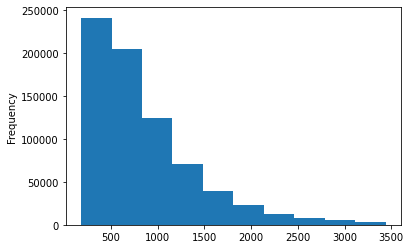

In [ ]:
data[data['vendor_id'] == 2]['trip_duration'].plot.hist()

In [ ]:
# Passenger Counts:
raw_data['passenger_count'].value_counts().sort_index()

# Notice anything?

0         60
1    1033540
2     210318
3      59896
4      28404
5      78088
6      48333
7          3
8          1
9          1
Name: passenger_count, dtype: int64

In [ ]:
# Remove records with 0, 7, or 9 passengers
filter = (data['passenger_count'] > 0) & (data['passenger_count'] < 7)
data = data[filter]
data['passenger_count'].value_counts().sort_index()

1    969773
2    198714
3     56746
4     26876
5     73501
6     45447
Name: passenger_count, dtype: int64

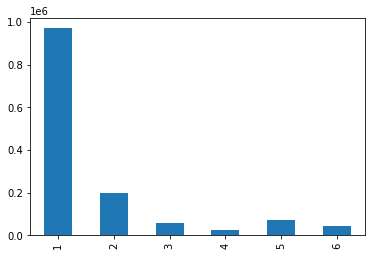

In [ ]:
data['passenger_count'].value_counts().sort_index().plot.bar()

In [ ]:
# Store and Forwad Flag
raw_data['store_and_fwd_flag'].value_counts()

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64

### 3. Feature Engineering
- Distance
- Day of the week
- Hour of the day
- month

In [ ]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
# Add the above features to data

data['day_of_week'] = data['pickup_datetime'].dt.dayofweek
data['hour'] = data['pickup_datetime'].dt.hour
data['month'] = data['pickup_datetime'].dt.month

data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,day_of_week,hour,month
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,0,17,3
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,0,6
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,11,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2,19,4
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,5,13,3


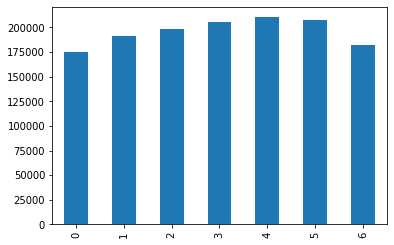

In [ ]:
# Trips per day

data['day_of_week'].value_counts().sort_index().plot.bar()

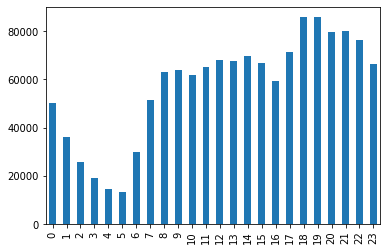

In [ ]:
# Trips per hour

data['hour'].value_counts().sort_index().plot.bar()

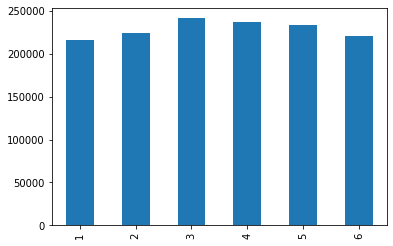

In [ ]:
# Trips per month

data['month'].value_counts().sort_index().plot.bar()

### 4. Bivariate Analysis

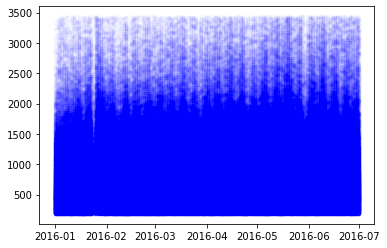

In [ ]:
# How is pick-up date time related to trip duration?

plt.plot(data['pickup_datetime'], data['trip_duration'], 'b.', alpha=0.01)

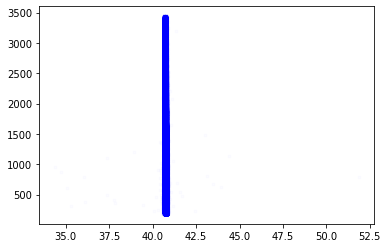

In [ ]:
# How is pick-up and drop-off location related to trip duration?

plt.plot(data['pickup_latitude'], data['trip_duration'], 'b.', alpha=0.01)

### Correlation Coefficient
The **correlation coefficient** is a numerical measurement of *linear* correlation between two variables.
- The value of correlation coefficient always lies in [-1, 1].
- If there is a strong positive correlation, then the coefficient is close to 1.
- If there is a strong negative correlation, then the coefficient is close to -1.
- If there is a very weak correlation, then the coefficient is close to 0.
- However, a near-zero coeffient may be caused by non-linear correlations.
![](https://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg)

In [ ]:
# Calculate correlation coefficients between each pair of features.

data.corr()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,day_of_week,hour,month
vendor_id,1.000000,0.286116,0.007691,0.002226,0.002000,0.004094,0.005500,0.001263,0.008645,-0.006147
passenger_count,0.286116,1.000000,0.001864,-0.004838,-0.000424,-0.002784,0.012106,0.025703,0.008784,-0.002486
pickup_longitude,0.007691,0.001864,1.000000,0.047877,0.803619,0.099065,0.167371,-0.014384,0.011206,0.000745
pickup_latitude,0.002226,-0.004838,0.047877,1.000000,0.112829,0.486872,-0.162388,-0.033557,0.009482,0.002934
dropoff_longitude,0.002000,-0.000424,0.803619,0.112829,1.000000,0.133924,0.107734,0.000183,-0.025807,0.003293
dropoff_latitude,0.004094,-0.002784,0.099065,0.486872,0.133924,1.000000,-0.146196,-0.024805,0.015341,0.001534
trip_duration,0.005500,0.012106,0.167371,-0.162388,0.107734,-0.146196,1.000000,-0.028787,0.027061,0.054260
day_of_week,0.001263,0.025703,-0.014384,-0.033557,0.000183,-0.024805,-0.028787,1.000000,-0.085267,-0.015127
hour,0.008645,0.008784,0.011206,0.009482,-0.025807,0.015341,0.027061,-0.085267,1.000000,-0.004024
month,-0.006147,-0.002486,0.000745,0.002934,0.003293,0.001534,0.054260,-0.015127,-0.004024,1.000000


In [ ]:
# Trip duration vs. aerial distance

# Euclidean distance: (y2 - y1) ** 2 + (x2 - x1) ** 2
data['aerial distance'] = np.sqrt((data['pickup_latitude'] - data['dropoff_latitude']) ** 2 +
                                  (data['pickup_longitude'] - data['dropoff_longitude']) ** 2)

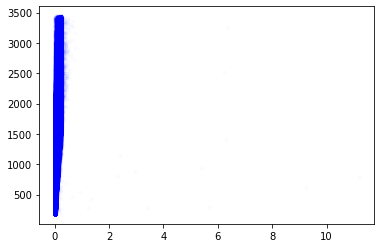

In [ ]:
# To make this figure useful, remove the outliers in the geospatial columns.
plt.plot(data['aerial distance'], data['trip_duration'], 'b.', alpha=0.01)

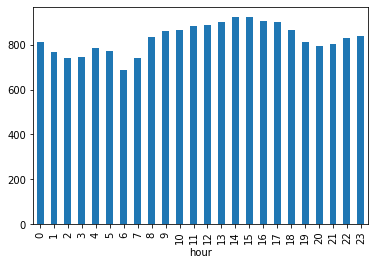

In [ ]:
# Trips per hour

# Average trip duration for each hour.
data.groupby('hour')['trip_duration'].mean().plot.bar()

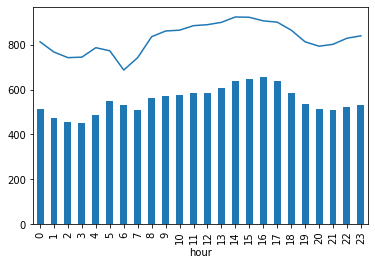

In [ ]:
data.groupby('hour')['trip_duration'].mean().plot.line()
data.groupby('hour')['trip_duration'].std().plot.bar()

In [ ]:
# Trips per day of the week



In [ ]:
# Trips per month

